In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install opendatasets --quiet
import opendatasets as od

od.download("https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedismail11
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset


100%|██████████| 19.0k/19.0k [00:00<00:00, 26.3MB/s]

In [10]:
import os
os.listdir("./gender-classification-dataset")


['gender_classification_v7.csv']

In [11]:
import pandas as pd

df = pd.read_csv("./gender-classification-dataset/gender_classification_v7.csv")
df.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


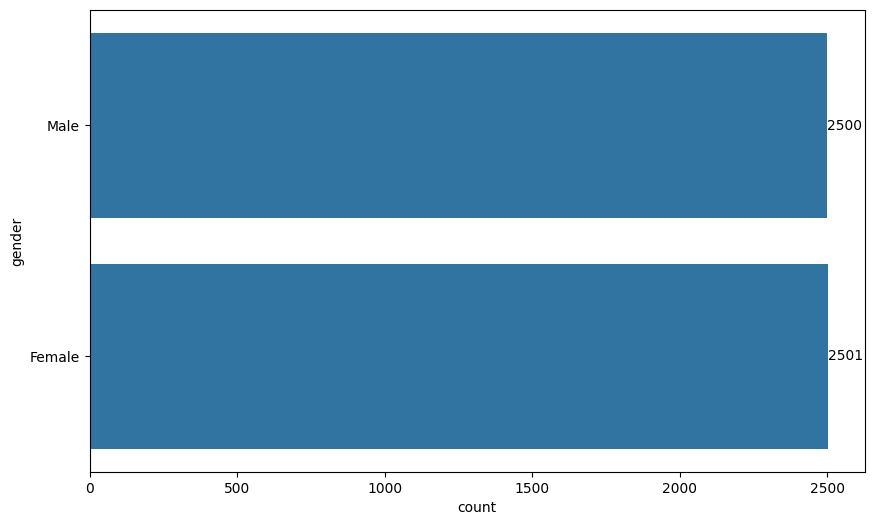

In [12]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y= 'gender')
ax.bar_label(ax.containers[0])
plt.show()

In [13]:
df.duplicated().sum()

np.int64(1768)

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

np.int64(0)

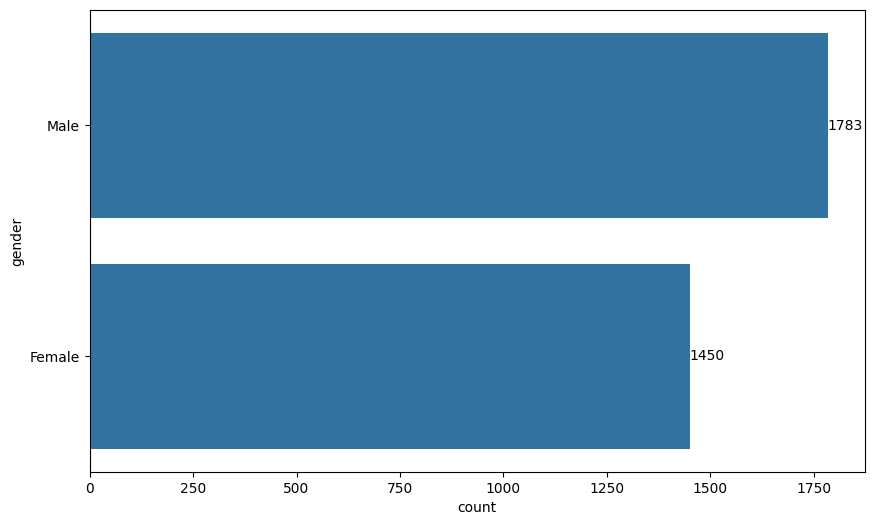

In [16]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y= 'gender')
ax.bar_label(ax.containers[0])
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [18]:
df['gender'] = le.fit_transform(df['gender'])

In [19]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [20]:
num_cols = ['forehead_width_cm', 'forehead_height_cm']

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
df ['forehead_width_cm']

,forehead_width_cm
0,11.8
1,14.0
2,11.8
3,14.4
4,13.5
...,...
4986,11.7
4990,12.6
4992,14.1
4993,11.6


In [24]:
for col in num_cols:
    df[[col]] = scaler.fit_transform(df[[col]])

In [25]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.270095,0.243699,1,0,1,1,1
1,0,0.701549,-1.029713,0,0,1,0,0
2,0,-1.270095,0.607531,1,1,1,1,1
3,0,1.060029,0.243699,0,1,1,1,1
4,1,0.253448,-0.120133,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('gender', axis=1)
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [33]:
model.score(X_train, y_train)

0.9644238205723125

In [34]:
model.score(X_test, y_test)

0.9567233384853169

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [36]:
y_pred = model.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.9567233384853169

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.97      0.95      0.96       357

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:
from sklearn.svm import SVC

In [42]:
model2= BaggingClassifier(
    estimator = DecisionTreeClassifier(), n_estimators=1000, n_jobs=-1, oob_score=True, random_state=42
)

In [43]:
model2.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, oob_score=True, random_state=42)

In [44]:
model2.score(X_train, y_train)

0.9976798143851509

In [45]:
model2.score(X_test, y_test)

0.9428129829984544

In [46]:
model2.oob_score_

0.9404485692188709

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model3 = RandomForestClassifier(n_estimators=200, max_depth=7)

In [49]:
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [50]:
model3.score(X_train, y_train)

0.9721577726218097

In [51]:
model3.score(X_test, y_test)

0.9629057187017002